CV matching with Job Position through cosine similarity

In cosine similarity, the closest the vectors are and the the smaller their angle is between them, the more similar they are to each other
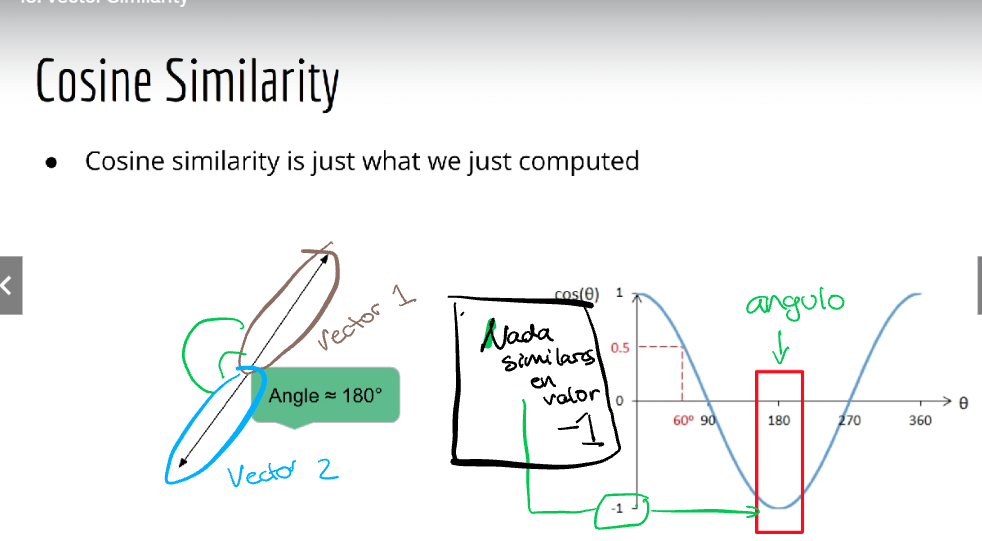

The idea here is to compare how similar the vector of a CV is to the vector of a job description, so the most similar they are, the most appropriate the candidate is for the job description.

In [1]:
# https://www.kaggle.com/tmdb/tmdb-movie-metadata
#!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
import pandas as pd
import matplotlib.pyplot as plt
import json
#iMPORTADO DE  SKLEARN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
df = pd.read_csv('my_data.csv')
df

raw_text           status
0   DIEGO RODOLFO HERRER A RUBIO   \nDIEGO RODOLFO...     considerados
1   ricardo herrera\njacobo\nIngeniero Energético ...     considerados
2    \n \n \n \nPERFIL  \nEgresado pasante de rela...     considerados
3    \n Herman Gregorio Parra Torcatt   \n\n \n \n...     considerados
4   05/Octubre /2022  \n \n  \nJuan Jorge Aparicio...     considerados
5   LUIS ANGEL GRIMALDO\nCERRITOS\nTSU INGENIERIA ...     considerados
6    \n  \n\n \n \n \n\nAFICIONES  \nMúsica  \nFut...  no_considerados
7    \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...  no_considerados
8   Nelson Salazar\nIngeniero Electrico\nJerez de ...  no_considerados
9   Perfil: Diseñador de moda\r\n\r\nObjetivo: Des...  no_considerados
10  Nombre: Josh Smith\r\n\r\nPerfil Profesional:\...     considerados
11  Nombre: Ana González\r\n\r\nPerfil:\r\n\r\nRec...     considerados
12  Nombre: George López \r\n\r\nPerfil: Técnico e...     considerados
13  Nombre: Juan Pérez\r\n\r\nPerfil profesional: ...     considerados
14  Sofía García\r\nEnfermera con experiencia en c...  no_considerados
15  Nombre: Ana Martínez\r\n\r\nPerfil profesional...  no_considerados
16  Nombre: Ana García\r\n\r\nPerfil: Vendedora in...     considerados
17  Perfil profesional:\r\n\r\nSoy un vendedor con...     considerados
18  Perfil Profesional:\r\n\r\nSoy una persona pro...     considerados
19  Perfil: Diseñador gráfico\r\nEducación: Licenc...  no_considerados
20  Perfil: Chef de cocina\r\nEducación: Licenciat...  no_considerados
21  Perfil: Secretaria\r\nEducación: Bachillerato ...  no_considerados
22  Perfil: Jardín de niños\r\nEducación: Licencia...  no_considerados
23  Perfil: Entrenador personal\r\nEducación: Cert...  no_considerados
24  Beatriz Mendez \nIngeniero de Soporte\n\nPerfi...  no_considerados
25  Información personal:\r\nNombre: Juan García\r...  no_considerados
26  Información Personal:\n\nNombre: Juan Pérez\n\...  no_considerados
27  Nombre: Pancha Lua\n\nPerfil Profesional:\n\nS...  no_considerados
28  INFORMACIÓN PERSONAL\r\n\r\nNombre completo: A...  no_considerados

In [3]:
jobs = pd.read_csv('jobs.csv')
jobs

jobs  \
0  Asesor Comercial Comisionista de Paneles Solares   
1                                  Asesor Comercial   
2                           Representante de ventas   
3                                        INSTALADOR   

                                         description  
0  Trabajo por comisión.\r\nTrabajadores independ...  
1  Trabajo por comisión.\nTrabajadores independie...  
2  Trabajo por comisión.\nTrabajadores independie...  
3  En TERRA ENERGY estamos buscando a nuestro pró...

In [4]:
from nltk.corpus import stopwords
stopwords_espanol = stopwords.words('spanish')
stopwords_cv = ['correo', 'contacto', 'mail', 'email', 'telefono', 'celular','direccion', 'domicilio', 'perfil']
stopwords_espanol = stopwords_espanol + stopwords_cv
stopwords_espanol

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

Remove accents from stopwords

In [5]:

from unidecode import unidecode


# remove accents from each string in the array
stopwords_espanol = [unidecode(s) for s in stopwords_espanol]


In [6]:
#Recuerda que tfidf es una matriz entonces estas diciendo que no podra tener mas de 800 columnas
#keeping the most frecuent terms in the corpus
from sklearn.feature_extraction.text import CountVectorizer
#I chose 800 words max because the CV and the descriptions are not too long
tfidf = CountVectorizer(max_features=50, strip_accents="ascii", lowercase = True, stop_words=stopwords_espanol )

In [7]:
#unir jobs y cvs
result = pd.concat([df["raw_text"], jobs["description"]], ignore_index=True)
result

0     DIEGO RODOLFO HERRER A RUBIO   \nDIEGO RODOLFO...
1     ricardo herrera\njacobo\nIngeniero Energético ...
2      \n \n \n \nPERFIL  \nEgresado pasante de rela...
3      \n Herman Gregorio Parra Torcatt   \n\n \n \n...
4     05/Octubre /2022  \n \n  \nJuan Jorge Aparicio...
5     LUIS ANGEL GRIMALDO\nCERRITOS\nTSU INGENIERIA ...
6      \n  \n\n \n \n \n\nAFICIONES  \nMúsica  \nFut...
7      \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...
8     Nelson Salazar\nIngeniero Electrico\nJerez de ...
9     Perfil: Diseñador de moda\r\n\r\nObjetivo: Des...
10    Nombre: Josh Smith\r\n\r\nPerfil Profesional:\...
11    Nombre: Ana González\r\n\r\nPerfil:\r\n\r\nRec...
12    Nombre: George López \r\n\r\nPerfil: Técnico e...
13    Nombre: Juan Pérez\r\n\r\nPerfil profesional: ...
14    Sofía García\r\nEnfermera con experiencia en c...
15    Nombre: Ana Martínez\r\n\r\nPerfil profesional...
16    Nombre: Ana García\r\n\r\nPerfil: Vendedora in...
17    Perfil profesional:\r\n\r\nSoy un vendedor

In [8]:
#vamos crear una matriz de tdidf con los textos del cv
cvs = tfidf.fit_transform(result)
cvs

<33x50 sparse matrix of type '<class 'numpy.int64'>'
	with 640 stored elements in Compressed Sparse Row format>

In [9]:
#de la matriz de tdidfm tomaremos el primer cv para hacer una prueba de query
query = cvs[0]

In [10]:
#falta adaptar para hacer comparación
scores = cosine_similarity(query,  cvs[9])
scores

array([[0.37149077]])

In [11]:
scores

array([[0.37149077]])